C:\Users\janse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[7.2  7.71]
 [3.19 1.91]
 [2.89 6.4 ]]


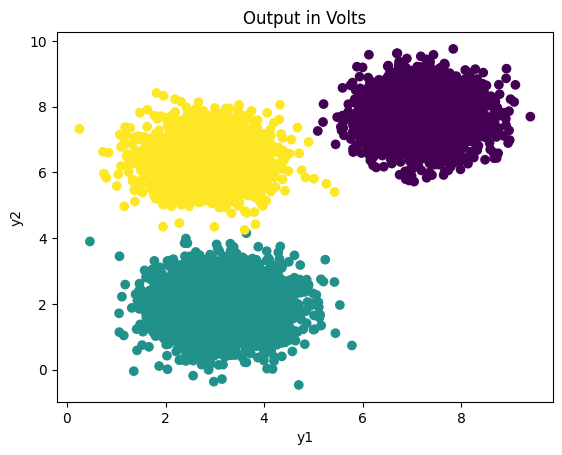

In [34]:
import pandas
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pandas.read_csv('volts.csv')

X1 = np.array(df['x1'][:])
X1 = np.array(df['x2'][:])
y1 = np.array(df['y1'][:])
y2 = np.array(df['y2'][:])

Y = np.column_stack((y1,y2))

km = KMeans(n_clusters=3)

data = km.fit_predict(Y)
plt.title('Output in Volts')
plt.ylabel('y2')
plt.xlabel('y1')
plt.scatter(Y[:,0],Y[:,1],c=data)

Z = km.cluster_centers_
Z = np.round(Z,2)
np.savetxt('Task_A.txt',Z, fmt = '%.2f')
print(Z)


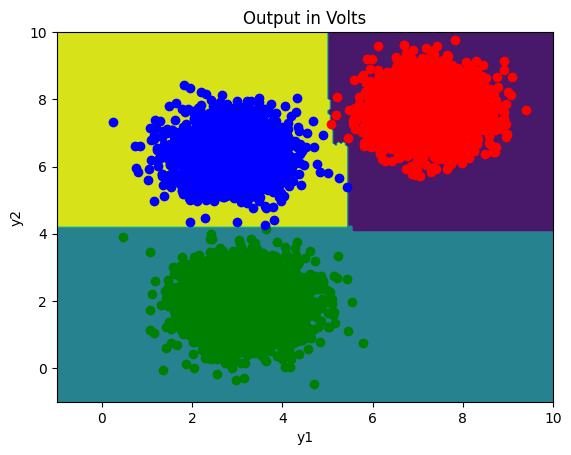

In [64]:
## doing the classification using random forest
from sklearn.ensemble import RandomForestClassifier

def gen_sample_grid(npx=200, npy=200, limit = 4):
  x1line = np.linspace(-limit/10, limit, npx)
  x2line = np.linspace(-limit/10, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(limit=10)

# number estimators is the the number of trees being used
# depth is 20
clf = RandomForestClassifier(n_estimators=100,max_depth=10)

### for this Y is are X and data is are y
clf.fit(Y,data)
Xgrid = clf.predict(Xgrid)

Xgrid = np.reshape(Xgrid,[200,200])

plt.contourf(x1line,x2line,Xgrid,cmap='viridis')
plt.title('Output in Volts')
plt.ylabel('y2')
plt.xlabel('y1')
plt.scatter(Y[data==0,0],Y[data==0,1],c='red')
plt.scatter(Y[data==1,0],Y[data==1,1],c='green')
plt.scatter(Y[data==2,0],Y[data==2,1],c='blue')
#plt.scatter(Y[:,0],Y[:,1],c=(data+1))
